In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Preparation

### John Hopkins Github csv data

In [2]:
data_path_git = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path_git)

In [3]:
pd_raw

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/1/22,6/2/22,6/3/22,6/4/22,6/5/22,6/6/22,6/7/22,6/8/22,6/9/22,6/10/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,180419,180520,180584,180615,180615,180688,180741,180784,180864,180864
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,276221,276221,276310,276342,276401,276415,276468,276518,276583,276638
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265887,265889,265889,265889,265897,265900,265904,265909,265920,265925
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,42894,42894,43067,43067,43067,43067,43067,43224,43224,43224
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761
5,NaN,Antarctica,-71.949900,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,8253,8295,8295,8378,8378,8378,8378,8378,8406,8479
7,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,9230573,9230573,9230573,9230573,9276618,9276618,9276618,9276618,9276618,9276618
8,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,422963,422963,422963,422963,422963,423006,423006,423006,423006,423006
9,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,133582,134286,134286,134286,134286,136860,137664,138407,138919,139894


In [4]:
pd_raw.columns[:]

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/1/22', '6/2/22', '6/3/22', '6/4/22', '6/5/22', '6/6/22', '6/7/22',
       '6/8/22', '6/9/22', '6/10/22'],
      dtype='object', length=875)

In [5]:
time_idx = pd_raw.columns[4:]

In [6]:
df_plot = pd.DataFrame({
    'date': time_idx})

df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [7]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [8]:
pd_raw[pd_raw['Country/Region']=='India'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [9]:
country_list = ['Germany',
                'India',
                'Singapore',
                'Norway',
                'Netherlands',    
]

In [10]:
for each in country_list:
    df_plot[each] = np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [11]:
df_plot.head()

,date,Germany,India,Singapore,Norway,Netherlands
0,1/22/20,0,0,0,0,0
1,1/23/20,0,0,1,0,0
2,1/24/20,0,0,3,0,0
3,1/25/20,0,0,3,0,0
4,1/26/20,0,0,4,0,0


<AxesSubplot:xlabel='date'>

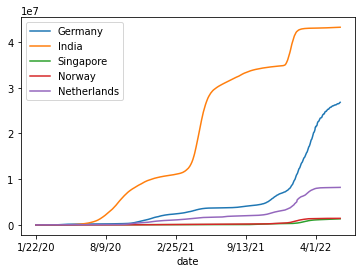

In [12]:
%matplotlib inline
df_plot.set_index('date').plot()

### Data type date

In [13]:
df_plot.head()

,date,Germany,India,Singapore,Norway,Netherlands
0,1/22/20,0,0,0,0,0
1,1/23/20,0,0,1,0,0
2,1/24/20,0,0,3,0,0
3,1/25/20,0,0,3,0,0
4,1/26/20,0,0,4,0,0


In [14]:
from datetime import datetime

In [15]:
df_plot.date[0]

'1/22/20'

In [16]:
datetime.strptime(df_plot.date[0],"%m/%d/%y")

datetime.datetime(2020, 1, 22, 0, 0)

In [17]:
time_idx = [datetime.strptime(each,"%m/%d/%y") for each in df_plot.date]

In [18]:
time_idx

[datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 23, 0, 0),
 datetime.datetime(2020, 1, 24, 0, 0),
 datetime.datetime(2020, 1, 25, 0, 0),
 datetime.datetime(2020, 1, 26, 0, 0),
 datetime.datetime(2020, 1, 27, 0, 0),
 datetime.datetime(2020, 1, 28, 0, 0),
 datetime.datetime(2020, 1, 29, 0, 0),
 datetime.datetime(2020, 1, 30, 0, 0),
 datetime.datetime(2020, 1, 31, 0, 0),
 datetime.datetime(2020, 2, 1, 0, 0),
 datetime.datetime(2020, 2, 2, 0, 0),
 datetime.datetime(2020, 2, 3, 0, 0),
 datetime.datetime(2020, 2, 4, 0, 0),
 datetime.datetime(2020, 2, 5, 0, 0),
 datetime.datetime(2020, 2, 6, 0, 0),
 datetime.datetime(2020, 2, 7, 0, 0),
 datetime.datetime(2020, 2, 8, 0, 0),
 datetime.datetime(2020, 2, 9, 0, 0),
 datetime.datetime(2020, 2, 10, 0, 0),
 datetime.datetime(2020, 2, 11, 0, 0),
 datetime.datetime(2020, 2, 12, 0, 0),
 datetime.datetime(2020, 2, 13, 0, 0),
 datetime.datetime(2020, 2, 14, 0, 0),
 datetime.datetime(2020, 2, 15, 0, 0),
 datetime.datetime(2020, 2, 16, 0,

In [19]:
time_str = [each.strftime('%y-%m-%d') for each in time_idx]
time_str

['20-01-22',
 '20-01-23',
 '20-01-24',
 '20-01-25',
 '20-01-26',
 '20-01-27',
 '20-01-28',
 '20-01-29',
 '20-01-30',
 '20-01-31',
 '20-02-01',
 '20-02-02',
 '20-02-03',
 '20-02-04',
 '20-02-05',
 '20-02-06',
 '20-02-07',
 '20-02-08',
 '20-02-09',
 '20-02-10',
 '20-02-11',
 '20-02-12',
 '20-02-13',
 '20-02-14',
 '20-02-15',
 '20-02-16',
 '20-02-17',
 '20-02-18',
 '20-02-19',
 '20-02-20',
 '20-02-21',
 '20-02-22',
 '20-02-23',
 '20-02-24',
 '20-02-25',
 '20-02-26',
 '20-02-27',
 '20-02-28',
 '20-02-29',
 '20-03-01',
 '20-03-02',
 '20-03-03',
 '20-03-04',
 '20-03-05',
 '20-03-06',
 '20-03-07',
 '20-03-08',
 '20-03-09',
 '20-03-10',
 '20-03-11',
 '20-03-12',
 '20-03-13',
 '20-03-14',
 '20-03-15',
 '20-03-16',
 '20-03-17',
 '20-03-18',
 '20-03-19',
 '20-03-20',
 '20-03-21',
 '20-03-22',
 '20-03-23',
 '20-03-24',
 '20-03-25',
 '20-03-26',
 '20-03-27',
 '20-03-28',
 '20-03-29',
 '20-03-30',
 '20-03-31',
 '20-04-01',
 '20-04-02',
 '20-04-03',
 '20-04-04',
 '20-04-05',
 '20-04-06',
 '20-04-07',

In [20]:
df_plot['date'] = time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
df_plot.head()

,date,Germany,India,Singapore,Norway,Netherlands
0,2020-01-22,0,0,0,0,0
1,2020-01-23,0,0,1,0,0
2,2020-01-24,0,0,3,0,0
3,2020-01-25,0,0,3,0,0
4,2020-01-26,0,0,4,0,0


In [22]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv', sep=';', index = False)

## Relational Data Model - defining a primary key

In [23]:
data_path_git = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path_git)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/1/22,6/2/22,6/3/22,6/4/22,6/5/22,6/6/22,6/7/22,6/8/22,6/9/22,6/10/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180419,180520,180584,180615,180615,180688,180741,180784,180864,180864
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276221,276221,276310,276342,276401,276415,276468,276518,276583,276638
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265887,265889,265889,265889,265897,265900,265904,265909,265920,265925
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42894,42894,43067,43067,43067,43067,43067,43224,43224,43224
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [24]:
pd_data_base = pd_raw.rename(columns = {'Country/Region': 'country', 'Province/State' : 'state'})

In [25]:
pd_data_base = pd_data_base.drop(['Lat','Long'], axis=1)

In [26]:
test_pd = pd_data_base.set_index(['state','country']).T

In [27]:
test_pd.stack(level=[0,1]).reset_index()

,level_0,state,country,0
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
419817,6/10/22,Zhejiang,West Bank and Gaza,657879.0
419818,6/10/22,Zhejiang,Winter Olympics 2022,535.0
419819,6/10/22,Zhejiang,Yemen,11822.0
419820,6/10/22,Zhejiang,Zambia,323058.0


In [28]:
pd_data_base.dtypes

state      object
country    object
1/22/20     int64
1/23/20     int64
1/24/20     int64
            ...  
6/6/22      int64
6/7/22      int64
6/8/22      int64
6/9/22      int64
6/10/22     int64
Length: 873, dtype: object

## Group by 

In [29]:
rel_data = pd.read_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',parse_dates=[0])
rel_data = rel_data.sort_values('date',ascending=True).reset_index(drop=True).copy()
rel_data.head()

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0.0
1,2020-01-22,no,Kosovo,0.0
2,2020-01-22,no,Kuwait,0.0
3,2020-01-22,no,Kyrgyzstan,0.0
4,2020-01-22,no,Laos,0.0


In [30]:
test_data = rel_data[((rel_data['country']=='India') | 
                     (rel_data['country']=='Spain') | 
                     (rel_data['country']=='Canada')) & 
                     (rel_data['date']>'2020-05-05')]

test_data

,date,state,country,confirmed
29988,2020-05-06,no,India,52987.0
30011,2020-05-06,no,Spain,220325.0
30068,2020-05-06,New Brunswick,Canada,120.0
30072,2020-05-06,Manitoba,Canada,286.0
30090,2020-05-06,Repatriated Travellers,Canada,0.0
...,...,...,...,...
248141,2022-06-10,Alberta,Canada,584763.0
248153,2022-06-10,Diamond Princess,Canada,0.0
248161,2022-06-10,Grand Princess,Canada,13.0
248163,2022-06-10,Saskatchewan,Canada,138992.0


In [31]:
test_data.groupby(['country']).agg(np.max)

,date,state,confirmed
country,,,
Canada,2022-06-10,Yukon,1327956.0
India,2022-06-10,no,43213435.0
Spain,2022-06-10,no,12478994.0


In [32]:
test_data.groupby(['state','country']).agg(np.max)

,,date,confirmed
state,country,,
Alberta,Canada,2022-06-10,584763.0
British Columbia,Canada,2022-06-10,372611.0
Diamond Princess,Canada,2022-06-10,1.0
Grand Princess,Canada,2022-06-10,13.0
Manitoba,Canada,2022-06-10,144895.0
New Brunswick,Canada,2022-06-10,66345.0
Newfoundland and Labrador,Canada,2022-06-10,46647.0
Northwest Territories,Canada,2022-06-10,12117.0
Nova Scotia,Canada,2022-06-10,99514.0


In [33]:
# %load ../src/features/build_features.py

import numpy as np
from sklearn import linear_model
import pandas as pd
from scipy import signal

reg = linear_model.LinearRegression(fit_intercept=True)

def get_rate_via_regression(in_array):
    
    #y = np.array(in_array['confirmed'])
    #x = np.arange(len(y)).reshape(-1,1)
    
    y = np.array(in_array)
    x = np.arange(-1,2).reshape(-1,1)
   
    #assert len(in_array) == 3
    
    reg.fit(x,y)
    intercept = reg.intercept_
    slope = reg.coef_
    
    return intercept/slope

In [34]:
#test_data.groupby(['state','country']).apply(get_rate_via_regression)

In [35]:
def rolling_reg(df_input,col='confirmed'):
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_rate_via_regression,raw=False)
    return result
    

In [36]:
test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

state    country        
Alberta  Canada   30116            NaN
                  30403            NaN
                  30687      89.274074
                  30994      87.009524
                  31258      79.604301
                               ...    
no       Spain    246897           inf
                  247180    745.762933
                  247486    746.429600
                  247752           inf
                  248033    586.522046
Name: confirmed, Length: 13788, dtype: float64

In [37]:
pd_DR_result=test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed').reset_index()

In [38]:
pd_DR_result=pd_DR_result.rename(columns={'confirmed':'confirmed_DR',
                             'level_2':'index'})
pd_DR_result.head()

,state,country,index,confirmed_DR
0,Alberta,Canada,30116,NaN
1,Alberta,Canada,30403,NaN
2,Alberta,Canada,30687,89.274074
3,Alberta,Canada,30994,87.009524
4,Alberta,Canada,31258,79.604301


In [39]:
rel_data=rel_data.reset_index()
rel_data.head()

,index,date,state,country,confirmed
0,0,2020-01-22,Alberta,Canada,0.0
1,1,2020-01-22,no,Kosovo,0.0
2,2,2020-01-22,no,Kuwait,0.0
3,3,2020-01-22,no,Kyrgyzstan,0.0
4,4,2020-01-22,no,Laos,0.0


In [40]:
pd_result_large=pd.merge(rel_data,pd_DR_result[['index','confirmed_DR']],on=['index'],how='left')
pd_result_large.head()

,index,date,state,country,confirmed,confirmed_DR
0,0,2020-01-22,Alberta,Canada,0.0,NaN
1,1,2020-01-22,no,Kosovo,0.0,NaN
2,2,2020-01-22,no,Kuwait,0.0,NaN
3,3,2020-01-22,no,Kyrgyzstan,0.0,NaN
4,4,2020-01-22,no,Laos,0.0,NaN


## Filtering with group by 

In [41]:
from scipy import signal

def savgol_filter(df_input,column='confirmed',window=5):
    window=5, 
    degree=1
    df_result=df_input
    
    filter_in=df_input[column].fillna(0)
    
    result=signal.savgol_filter(np.array(filter_in),
                           5, #window size
                           1)
    df_result[column+'_filtered']=result
    return df_result
        

In [42]:
pd_filtered_result=rel_data[['state','country','confirmed']].groupby(['state','country']).apply(savgol_filter).reset_index()

In [43]:
pd_result_large=pd.merge(pd_result_large,pd_filtered_result[['index','confirmed_filtered']],on=['index'],how='left')
pd_result_large.head()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered
0,0,2020-01-22,Alberta,Canada,0.0,NaN,0.0
1,1,2020-01-22,no,Kosovo,0.0,NaN,0.0
2,2,2020-01-22,no,Kuwait,0.0,NaN,0.0
3,3,2020-01-22,no,Kyrgyzstan,0.0,NaN,0.0
4,4,2020-01-22,no,Laos,0.0,NaN,0.0


## Filtered doubling rate

In [44]:

pd_filtered_doubling=pd_result_large[['state','country','confirmed_filtered']].groupby(['state','country']).apply(rolling_reg,'confirmed_filtered').reset_index()

pd_filtered_doubling=pd_filtered_doubling.rename(columns={'confirmed_filtered':'doubling_rate_filtered',
                             'level_2':'index'})

pd_filtered_doubling.head()

,state,country,index,doubling_rate_filtered
0,Alberta,Canada,0,NaN
1,Alberta,Canada,499,NaN
2,Alberta,Canada,762,NaN
3,Alberta,Canada,1069,NaN
4,Alberta,Canada,1333,NaN


In [46]:
pd_result_large=pd.merge(pd_result_large,pd_filtered_doubling[['index','doubling_rate_filtered']],on=['index'],how='left')
pd_result_large.head()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered,doubling_rate_filtered
0,0,2020-01-22,Alberta,Canada,0.0,NaN,0.0,NaN
1,1,2020-01-22,no,Kosovo,0.0,NaN,0.0,NaN
2,2,2020-01-22,no,Kuwait,0.0,NaN,0.0,NaN
3,3,2020-01-22,no,Kyrgyzstan,0.0,NaN,0.0,NaN
4,4,2020-01-22,no,Laos,0.0,NaN,0.0,NaN


In [47]:
mask=pd_result_large['confirmed']>100

In [48]:
pd_result_large['doubling_rate_filtered']=pd_result_large['doubling_rate_filtered'].where(mask, other=np.NaN) 

In [49]:
pd_result_large.head()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered,doubling_rate_filtered
0,0,2020-01-22,Alberta,Canada,0.0,NaN,0.0,NaN
1,1,2020-01-22,no,Kosovo,0.0,NaN,0.0,NaN
2,2,2020-01-22,no,Kuwait,0.0,NaN,0.0,NaN
3,3,2020-01-22,no,Kyrgyzstan,0.0,NaN,0.0,NaN
4,4,2020-01-22,no,Laos,0.0,NaN,0.0,NaN


In [50]:
pd_result_large.to_csv('../data/processed/COVID_final_set.csv',sep=';')